In [41]:
import pickle
import os
import numpy as np

import sys

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib
import matplotlib.pyplot as plt

figure_path = module_path + '/figures/small_segment_dataset_plots/'

plot_label = 'Pitch'


plot_factor = {
    'Pitch' : np.linspace(1, 30, 5),
    'Noise':  np.linspace(0.0001, 0.1, 5),
    'Shift' : np.linspace(2, 15, 5)
}

with open(os.getcwd() + f'/pickles/probs_{plot_label.lower()}', 'rb') as f:
    y_probs = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/probs_mc_{plot_label.lower()}', 'rb') as f:
    y_probs_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/probs_de_{plot_label.lower()}', 'rb') as f:
    y_probs_de = pickle.load(f)

with open(os.getcwd() + f'/pickles/briers_mc_{plot_label.lower()}', 'rb') as f:
    briers_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/accs_mc_{plot_label.lower()}', 'rb') as f:
    accs_mc = pickle.load(f)

with open(os.getcwd() + f'/pickles/eces_mc_{plot_label.lower()}', 'rb') as f:
    eces_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/re_acc_mc_{plot_label.lower()}', 'rb') as f:
    re_acc_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/entropy_mc_{plot_label.lower()}', 'rb') as f:
    entropy_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/briers_{plot_label.lower()}', 'rb') as f:
    briers = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/accs_{plot_label.lower()}', 'rb') as f:
    accs = pickle.load(f)

with open(os.getcwd() + f'/pickles/eces_{plot_label.lower()}', 'rb') as f:
    eces = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/re_acc_{plot_label.lower()}', 'rb') as f:
    re_acc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/entropy_{plot_label.lower()}', 'rb') as f:
    entropy = pickle.load(f)
    
    
with open(os.getcwd() + f'/pickles/briers_de_{plot_label.lower()}', 'rb') as f:
    briers_de = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/accs_de_{plot_label.lower()}', 'rb') as f:
    accs_de = pickle.load(f)

with open(os.getcwd() + f'/pickles/eces_de_{plot_label.lower()}', 'rb') as f:
    eces_de = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/re_acc_de_{plot_label.lower()}', 'rb') as f:
    re_acc_de = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/entropy_de_{plot_label.lower()}', 'rb') as f:
    entropy_de = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/counts_mc_{plot_label.lower()}', 'rb') as f:
    counts_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/counts_{plot_label.lower()}', 'rb') as f:
    counts = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/counts_de_{plot_label.lower()}', 'rb') as f:
    counts_de = pickle.load(f)
    
    
    
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)
colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
colors_opa = ['#F9414466', '#90BE6D66', '#57759066','#F3722C66', '#F8961E66',
              '#F9844A66', '#F9C74F66', '#43AA8B66', '#4D908E66', '#277DA166']


colors = {
    'DE' : '#be6d90',
    'MC' : '#f96244',
    'CNN' : '#90BE6D'
}

# Entropy

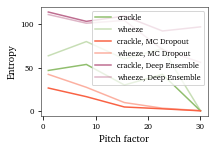

In [42]:
f, ax = plt.subplots(1,1)
f.set_size_inches(3, 2)


ax.plot(plot_factor[plot_label], np.array(entropy)[:,0], label = 'crackle',c = colors['CNN'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], np.array(entropy)[:,1], label = 'wheeze', c = colors['CNN'], linewidth = 1.5, alpha = 0.5)

ax.plot(plot_factor[plot_label], np.array(entropy_mc)[:,0], label = 'crackle, MC Dropout', c = colors['MC'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], np.array(entropy_mc)[:,1], label = 'wheeze, MC Dropout', c = colors['MC'], linewidth = 1.5, alpha = 0.5)

ax.plot(plot_factor[plot_label], np.array(entropy_de)[:,0], label = 'crackle, Deep Ensemble', c = colors['DE'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], np.array(entropy_de)[:,1], label = 'wheeze, Deep Ensemble', c = colors['DE'], linewidth = 1.5, alpha = 0.5)

ax.set_ylabel('Entropy', fontproperties = font)
ax.set_xlabel(f'{plot_label} factor', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
#ax.legend(bbox_to_anchor=(1,0.5), prop = font_small)
ax.legend(prop = font_small)

plt.savefig(figure_path + f'entropy_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

# Accuracy

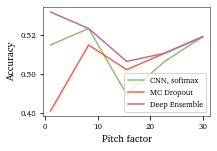

In [43]:
f, ax = plt.subplots(1,1)
f.set_size_inches(3, 2)


ax.plot(plot_factor[plot_label], accs, label = 'CNN, softmax', c = colors['CNN'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], accs_mc, label = 'MC Dropout', c = colors['MC'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], accs_de, label = 'Deep Ensemble', c = colors['DE'], linewidth = 1.5)

ax.set_ylabel('Accuracy', fontproperties = font)
ax.set_xlabel(f'{plot_label} factor', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.legend(prop = font_small)
#ax.set_ylim(0.0,1.05)

plt.savefig(figure_path + f'accuracy_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

# Brier score


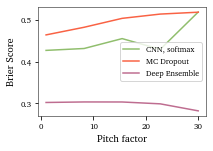

In [44]:
f, ax = plt.subplots(1,1)
f.set_size_inches(3, 2)


ax.plot(plot_factor[plot_label], briers, label = 'CNN, softmax', c = colors['CNN'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], briers_mc, label = 'MC Dropout', c = colors['MC'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], briers_de, label = 'Deep Ensemble', c = colors['DE'], linewidth = 1.5)

ax.set_ylabel('Brier Score', fontproperties = font)
ax.set_xlabel(f'{plot_label} factor', fontproperties = font)

for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.legend(prop = font_small)
#ax.set_ylim(0.0,1.05)

plt.savefig(figure_path + f'brier_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

# ECE

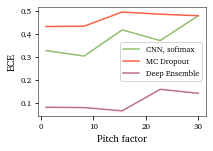

In [45]:
f, ax = plt.subplots(1,1)
f.set_size_inches(3, 2)

ax.plot(plot_factor[plot_label], eces, label = 'CNN, softmax', c = colors['CNN'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], eces_mc, label = 'MC Dropout', c = colors['MC'], linewidth = 1.5)
ax.plot(plot_factor[plot_label], eces_de, label = 'Deep Ensemble', c = colors['DE'], linewidth = 1.5)

ax.set_ylabel('ECE', fontproperties = font)
ax.set_xlabel(f'{plot_label} factor', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.legend(prop = font_small)
#ax.set_ylim(0.0,1.05)

plt.savefig(figure_path + f'ece_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

# Accuracy Rejection curves

accuracy rejection curve when pitch is 15.5 (pitch factor[2])

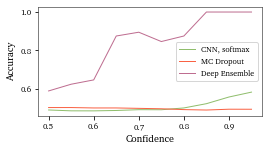

In [46]:
f, ax = plt.subplots(1,1)
f.set_size_inches(4, 2)


ax.plot(re_acc[2][0], re_acc[2][1], label = 'CNN, softmax', c = colors['CNN'], linewidth = 1)
ax.plot(re_acc_mc[2][0], re_acc_mc[2][1], label = 'MC Dropout', c = colors['MC'], linewidth = 1)
ax.plot(re_acc_de[2][0], re_acc_de[2][1], label = 'Deep Ensemble', c = colors['DE'], linewidth = 1)

ax.set_ylabel('Accuracy', fontproperties = font)
ax.set_xlabel('Confidence', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.legend(prop = font_small)
#ax.set_xlim(0.0,0.9)

plt.savefig(figure_path + f'acc_re_15_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

# Count plots

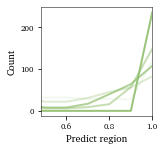

In [47]:
f, ax = plt.subplots(1,1)
f.set_size_inches(2, 2)
regions = np.linspace(0, 1, 11)+ .1


#ax.plot(re_acc[2][0], re_acc[2][1], label = 'CNN, softmax', c = colors[0], linewidth = 1)
#ax.plot(re_acc_mc[2][0], re_acc_mc[2][1], label = 'MC Dropout', c = colors[3], linewidth = 1)
#ax.plot(re_acc_de[2][0], re_acc_de[2][1], label = 'Deep Ensemble', c = colors[8], linewidth = 1)

for ( i, c) in enumerate(counts):
    plt.plot(regions, c, c = colors['CNN'], alpha = (0.1 + 0.2*i), linewidth = 2)

ax.set_ylabel('Count', fontproperties = font)
ax.set_xlabel('Predict region', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
#ax.legend(prop = font)
ax.set_xlim(0.48,1)

plt.savefig(figure_path + f'count_reg_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

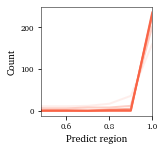

In [48]:
f, ax = plt.subplots(1,1)
f.set_size_inches(2, 2)


#ax.plot(re_acc[2][0], re_acc[2][1], label = 'CNN, softmax', c = colors[0], linewidth = 1)
#ax.plot(re_acc_mc[2][0], re_acc_mc[2][1], label = 'MC Dropout', c = colors[3], linewidth = 1)
#ax.plot(re_acc_de[2][0], re_acc_de[2][1], label = 'Deep Ensemble', c = colors[8], linewidth = 1)

for ( i, c) in enumerate(counts_mc):
    plt.plot(regions, c, c = colors['MC'], alpha = (0.1 + 0.2*i), linewidth = 2)

ax.set_ylabel('Count', fontproperties = font)
ax.set_xlabel('Predict region', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
#ax.legend(prop = font)
ax.set_xlim(0.48,1)

plt.savefig(figure_path + f'count_mc_reg_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

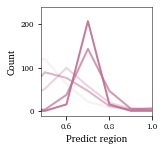

In [49]:
f, ax = plt.subplots(1,1)
f.set_size_inches(2, 2)


#ax.plot(re_acc[2][0], re_acc[2][1], label = 'CNN, softmax', c = colors[0], linewidth = 1)
#ax.plot(re_acc_mc[2][0], re_acc_mc[2][1], label = 'MC Dropout', c = colors[3], linewidth = 1)
#ax.plot(re_acc_de[2][0], re_acc_de[2][1], label = 'Deep Ensemble', c = colors[8], linewidth = 1)

for ( i, c) in enumerate(counts_de):
    plt.plot(regions, c, c = colors['DE'], alpha = (0.1 + 0.2*i), linewidth = 2)
    #break

ax.set_ylabel('Count', fontproperties = font)
ax.set_xlabel('Predict region', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
#ax.legend(prop = font)
ax.set_xlim(0.48,1)

plt.savefig(figure_path + f'count_de_reg_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')

## Accuracy rejection curve on the original test set

In [50]:
n_classes = 3

with open(os.getcwd() + f'/pickles/re_acc_de1_{n_classes}class', 'rb') as f:
    re_acc_de = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/re_acc_mc1_{n_classes}class', 'rb') as f:
    re_acc_mc = pickle.load(f)
    
with open(os.getcwd() + f'/pickles/re_acc1_{n_classes}class', 'rb') as f:
    re_acc = pickle.load(f)

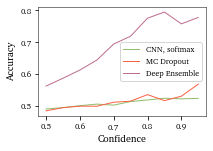

In [51]:
f, ax = plt.subplots(1,1)
f.set_size_inches(3, 2)


ax.plot(re_acc[1], re_acc[0], label = 'CNN, softmax', c = colors['CNN'], linewidth = 1)
ax.plot(re_acc_mc[1], re_acc_mc[0], label = 'MC Dropout', c = colors['MC'], linewidth = 1)
ax.plot(re_acc_de[1], re_acc_de[0], label = 'Deep Ensemble', c = colors['DE'], linewidth = 1)

ax.set_ylabel('Accuracy', fontproperties = font)
ax.set_xlabel('Confidence', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.legend(prop = font_small)
#ax.set_ylim(0.0,1.05)

plt.savefig(figure_path + f'acc_re_uncertainty_{n_classes}.pdf', bbox_inches='tight')

## BOXPLOTS ???

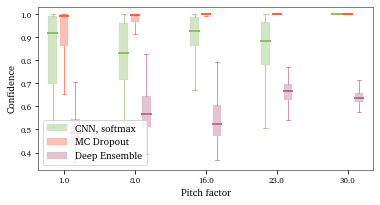

In [52]:
rounds = {
    'Pitch' : 0,
    'Noise': 4,
    'Shift' : 0
}


positions_left = np.linspace(0, 10, len(plot_factor[plot_label] )) - 0.4

positions_right = np.linspace(0, 10, len(plot_factor[plot_label] )) +  0.4

positions_middle = np.linspace(0, 10, len(plot_factor[plot_label] ))


f, ax = plt.subplots(1,1)
f.set_size_inches(6, 3)

#ax = sns.boxplot(data = {'CNN': y_probs, 'MC': y_probs_mc}, color = colors['MC'], linewidth = 0.5, saturation = 0.7)
bp0 = ax.boxplot(y_probs, widths = 0.3, showfliers=False, patch_artist=True, positions = positions_left)
bp1 = ax.boxplot(y_probs_mc , widths = 0.3, showfliers=False, patch_artist=True, positions = positions_middle)
bp2 = ax.boxplot(y_probs_de , widths = 0.3, showfliers=False, patch_artist=True, positions = positions_right)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

#texts = [t.get_text()  for t in ax.get_xticklabels()]
ax.set_xticks(positions_middle)
ax.set_xticklabels(np.round(plot_factor[plot_label], rounds[plot_label]) ,fontproperties = font_small)
#plt.xticks(ticks, labels)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
boxes = [bp0, bp1, bp2]
colors_list =  ['#90BE6D', '#f96244', '#be6d90']

ax.set_ylabel('Confidence', fontproperties = font)
ax.set_xlabel(f'{plot_label} factor', fontproperties = font)

for (i, box) in enumerate(boxes):
    for b in box['boxes']:
        b.set(color= 'k', linewidth=0.1)
        b.set(facecolor = colors_list[i] , alpha = 0.4)
    for b in box['medians']:
        b.set(color= colors_list[i], linewidth=2)
    for b in box['caps']:
        b.set(color= colors_list[i], linewidth=0.7)
    for b in box['whiskers']:
        b.set(color= colors_list[i], linewidth=0.7)
        
ax.legend([bp0["boxes"][0], bp1["boxes"][0], bp2["boxes"][0]],
          ['CNN, softmax', 'MC Dropout', 'Deep Ensemble'],
          loc='lower left', prop = font)

plt.savefig(figure_path + f'boxplot_uncertainty_{plot_label.lower()}.pdf', bbox_inches='tight')